여기 더 추가할 예정
- 장애인 거주시설 말고 편의시설로 정한 이유를 복지사업 응답 데이터나 복지서비스 이용경험 여부 데이터를 근거로 하여 설명

### 한글 폰트 설정

In [3]:
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic')
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rc('axes', unicode_minus=False)
plt.rcParams['axes.unicode_minus'] = False

### 2023년도 지역별 장애인 편의시설 설치 현황 데이터 사용

In [5]:
import csv

inst_status_pwd_2023 = []

with open('../데이터/2018_2023_시도별_장애인_편의시설_설치현황.csv', 'r', encoding='utf-8') as f:
    data = csv.reader(f)

    next(data)

    for row in data:
        row_2023 = row[0:1] + row[7:13]
        inst_status_pwd_2023.append(row_2023)
        print(row_2023)

['구분', '대상건물', '기준항목', '설치', '설치율', '적정설치', '적정설치율']
['서울', '34440', '812487', '747930', '92.1%', '682738', '84.0%']
['부산', '16320', '440244', '396768', '90.1%', '349422', '79.4%']
['대구', '8018', '263653', '237186', '90.0%', '214106', '81.2%']
['인천', '12555', '358048', '323222', '90.3%', '282107', '78.8%']
['광주', '7711', '227541', '203779', '89.6%', '178692', '78.5%']
['대전', '3945', '134611', '121277', '90.1%', '109774', '81.6%']
['울산', '2686', '92885', '84107', '90.6%', '76757', '82.6%']
['세종', '1421', '57530', '53897', '93.7%', '49854', '86.7%']
['경기', '44352', '1286189', '1172564', '91.2%', '1063908', '82.7%']
['강원', '8930', '288648', '245749', '85.1%', '213159', '73.9%']
['충북', '8028', '231005', '203961', '88.3%', '179874', '77.9%']
['충남', '11208', '343658', '303847', '88.4%', '269117', '78.3%']
['전북', '11212', '391752', '341557', '87.2%', '294994', '75.3%']
['전남', '10722', '361499', '305110', '84.4%', '258609', '71.5%']
['경북', '14782', '468721', '406321', '86.7%', '359225', '76.6%

### plt.bar()를 통한 지역별 장애인 편의시설 설치 현황 시각화

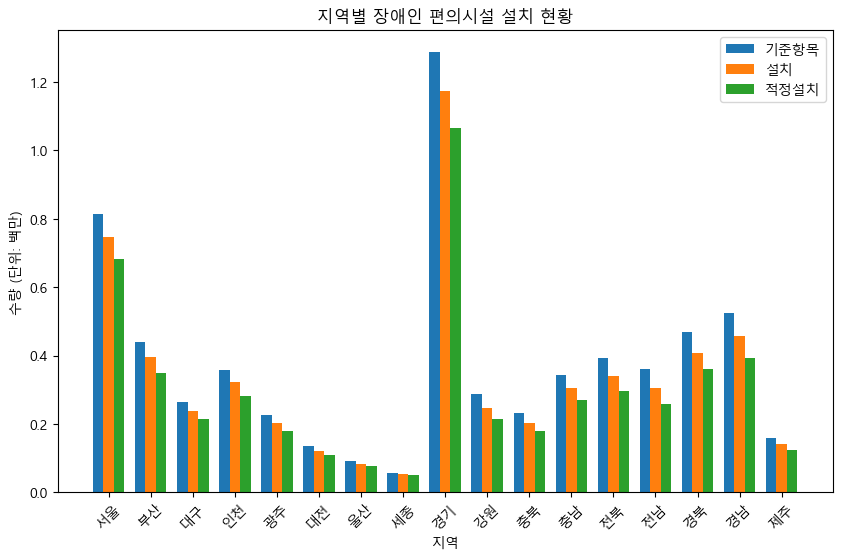

In [62]:
# 데이터 전처리
regions = [row[0] for row in inst_status_pwd_2023[1:-1]]
criteria = [int(row[2]) / 1e6 for row in inst_status_pwd_2023[1:-1]]
installations = [int(row[3]) / 1e6 for row in inst_status_pwd_2023[1:-1]]
appropriate_inst = [int(row[5]) / 1e6 for row in inst_status_pwd_2023[1:-1]]

# 바 그래프 그리기
x = np.arange(len(regions))
width = 0.25

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width, criteria, width, label='기준항목')
bars2 = ax.bar(x, installations, width, label='설치')
bars3 = ax.bar(x + width, appropriate_inst, width, label='적정설치')

# 그래프에 레이블 추가
ax.set_xlabel('지역')
ax.set_ylabel('수량 (단위: 백만)')
ax.set_title('지역별 장애인 편의시설 설치 현황')
ax.set_xticks(x)
ax.set_xticklabels(regions, rotation=45)
ax.legend()
plt.show()


- **기준항목**이란 법적 기준에 의거하여 설치해야하는 장애인 편의시설 수입니다.
- **설치**는 설치된 장애인 편의시설 수입니다.
- **적정설치**는 설치된 장애인 편의시설 중에서 법적 기준을 준수한 시설 수입니다.
- 경기 지역에 기준항목 수가 가장 많았습니다.

### sns.heatmap()을 통한 지역별 장애인 편의시설 설치율 및 적정설치율 비교

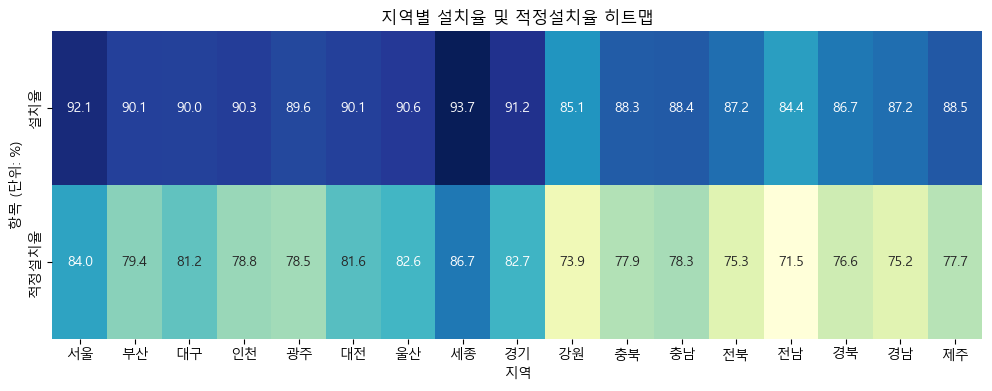

In [60]:
import seaborn as sns

inst_rate = [float(row[4].replace('%', '')) for row in inst_status_pwd_2023[1:-1]]
appropriate_inst_rate = [float(row[6].replace('%', '')) for row in inst_status_pwd_2023[1:-1]]

# 히트맵 데이터 생성
data = np.array([inst_rate, appropriate_inst_rate])
labels = ['설치율', '적정설치율']

# 히트맵 그리기
fig, ax = plt.subplots(figsize=(12, 4))

sns.heatmap(data, annot=True, fmt=".1f", cmap="YlGnBu", xticklabels=regions, yticklabels=labels, ax=ax, cbar=False)
ax.set_xlabel('지역')
ax.set_ylabel('항목 (단위: %)')
ax.set_title('지역별 설치율 및 적정설치율 히트맵')
plt.show()

- **설치율**은 기준항목 대비 설치 비율입니다.   
- **적정설치율**은 기준항목 대비 적정설치 비율로, 시설의 품질을 의미한다고 볼 수 있습니다.
- 색이 진할 수록 비율이 높아지며 색이 연할 수록 비율이 낮아집니다.
- 세종, 서울, 경기 지역에서 설치율과 적정설치율이 모두 높았으며, 전남과 강원 지역에서 설치율과 적정설치율이 모두 낮았습니다.

### plt.scatter()를 통한 지역별 장애인구 수와 편의시설 수의 관계 시각화

#### 2023년도 지역별 장애인구 수 데이터 사용

In [7]:
pwd_2023 = []

with open('../데이터/2023_장애유형별_시도별_등록장애인_수_20241130123153.csv', 'r', encoding='utf-8') as f:
    data = csv.reader(f)

    for row in data:
        row_2023 = row[1:3]
        pwd_2023.append(row_2023)
        print(row_2023)

['시도별', '합계']
['전국', '2641896']
['서울특별시', '389795']
['부산광역시', '175467']
['대구광역시', '130521']
['인천광역시', '152226']
['광주광역시', '69314']
['대전광역시', '71440']
['울산광역시', '51383']
['세종특별자치시', '12944']
['경기도', '586421']
['강원특별자치도', '100520']
['충청북도', '97117']
['충청남도', '134004']
['전북특별자치도', '130189']
['전라남도', '136472']
['경상북도', '178340']
['경상남도', '188825']
['제주특별자치도', '36918']


#### 지역별 장애인구 수 대비 편의시설 수 산점도 그리기

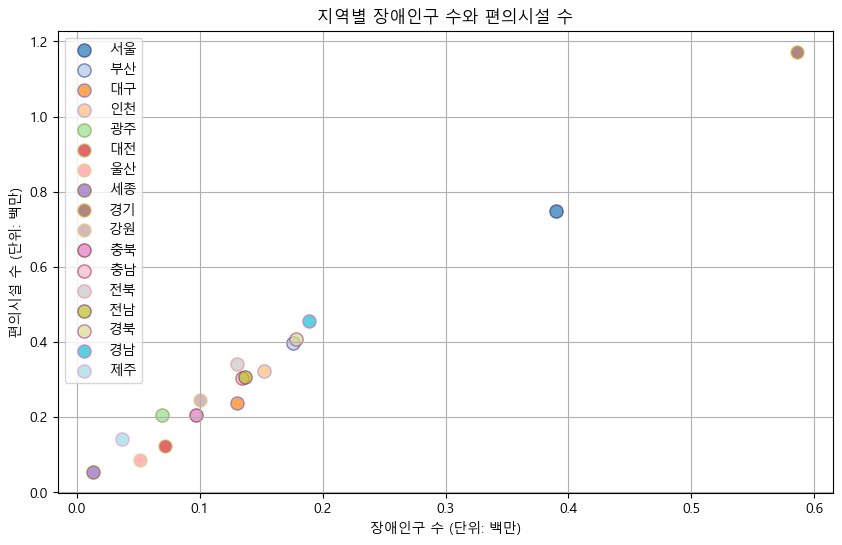

In [8]:
regions = [row[0] for row in inst_status_pwd_2023[1:-1]]
installations = [int(row[3]) / 1e6 for row in inst_status_pwd_2023[1:-1]]
population = [int(row[1]) / 1e6 for row in pwd_2023[2:]]

# 색상 지정
face_colors = plt.cm.tab20(np.linspace(0, 1, len(regions)))
edge_colors = plt.cm.tab20b(np.linspace(0, 1, len(regions)))

# 산점도 그리기
plt.figure(figsize=(10, 6))
for i, region in enumerate(regions):
    plt.scatter(population[i], installations[i], color=face_colors[i], edgecolors=edge_colors[i], label=region, alpha=0.7, s=90)

plt.xlabel('장애인구 수 (단위: 백만)')
plt.ylabel('편의시설 수 (단위: 백만)')
plt.title('지역별 장애인구 수와 편의시설 수')
plt.legend()
plt.grid(True)
plt.show()

- 서울과 경기 지역에서 장애인구 수와 편의시설 수가 모두 많았습니다.
- 평균적으로 편의시설 수는 장애인구 수보다 약 2배 정도 많았습니다.
- 편의시설 수량이 체감이 안되는 이유는 편의시설 항목 안에 시설을 구성하는 비치용품 등을 포함하고 있기 때문입니다.

### 평균 비율 선으로 장애인구 수 대비 편의시설 수가 상대적으로 많은 지역 확인

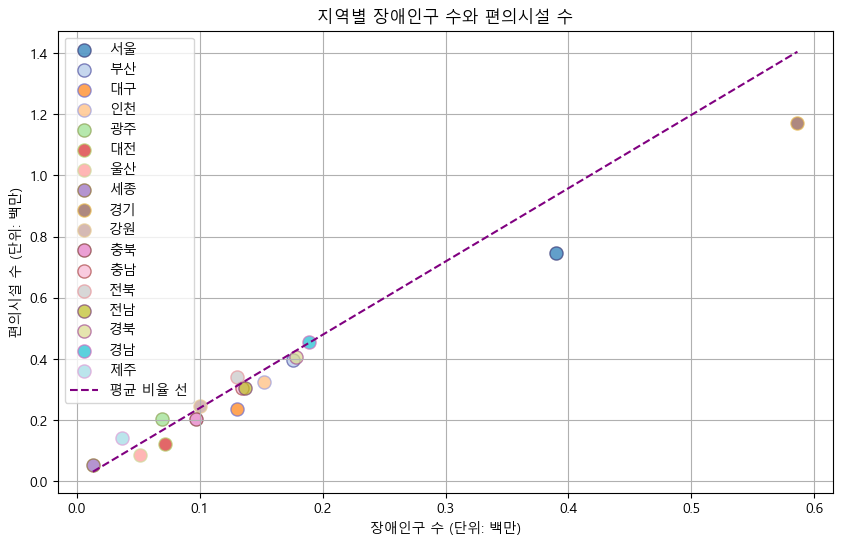

In [10]:
import numpy as np

regions = [row[0] for row in inst_status_pwd_2023[1:-1]]
installations = [int(row[3]) / 1e6 for row in inst_status_pwd_2023[1:-1]]
population = [int(row[1]) / 1e6 for row in pwd_2023[2:]]

# 색상 지정
face_colors = plt.cm.tab20(np.linspace(0, 1, len(regions)))
edge_colors = plt.cm.tab20b(np.linspace(0, 1, len(regions)))

# 산점도 그리기
plt.figure(figsize=(10, 6))
for i, region in enumerate(regions):
    plt.scatter(population[i], installations[i], color=face_colors[i], edgecolors=edge_colors[i], label=region, alpha=0.7, s=90)

# 평균 비율 계산
mean_ratio = np.mean([installations[i] / population[i] for i in range(len(regions))])
x_vals = np.linspace(min(population), max(population), 100)
y_vals = mean_ratio * x_vals
plt.plot(x_vals, y_vals, color='purple', linestyle='--', label='평균 비율 선')

plt.xlabel('장애인구 수 (단위: 백만)')
plt.ylabel('편의시설 수 (단위: 백만)')
plt.title('지역별 장애인구 수와 편의시설 수')
plt.legend()
plt.grid(True)
plt.show()


- 타 지역에 비해 상대적으로 세종, 제주, 광주, 전북 등이 장애인구 수 대비 편의시설 수가 높았습니다.
- 설치율과 적정설치율이 모두 높았던 경기와 서울의 경우, 장애인구 수 대비 편의시설 수는 상대적으로 낮았습니다.
- 장애인 편의시설은 공용시설을 포함하기 때문에 경기 또는 서울 지역에 편의시설을 늘려야 한다는 근거로 활용하기에는 한계가 있습니다.
- 결론적으로 복지 향상을 위해 더 많은 조사와 분석을 할 필요가 있습니다.

### 노인과 어린이 추가 예정